In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [4]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


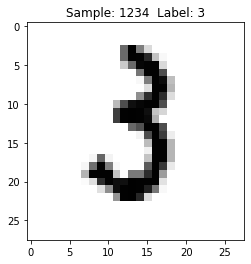

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 - 51s - loss: 0.1860 - accuracy: 0.9438 - val_loss: 0.0450 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 - 56s - loss: 0.0790 - accuracy: 0.9761 - val_loss: 0.0363 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 - 52s - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 - 50s - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 - 52s - loss: 0.0416 - accuracy: 0.9862 - val_loss: 0.0295 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 - 52s - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0298 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 - 52s - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0304 - val_accuracy: 0.9911
Epoch 8/10
1875/1875 - 52s - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 9/10
1875/1875 - 52s - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0319 - val_accuracy: 0.9921
Epoch 10/10
1875/1875 - 52s - loss: 0.0240 - accuracy: 0.9925 - val_loss: